<a href="https://colab.research.google.com/github/anselmobd/bc_ds3_alura/blob/main/AlluraDS3Modulo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Leptospirose

"A leptospirose é uma doença infecciosa febril aguda que resulta da exposição direta ou indireta a urina de animais (principalmente ratos) infectados pela bactéria Leptospira; sua penetração ocorre através da pele com lesões, pele íntegra imersa por longos períodos em água contaminada ou através de mucosas."

"No Brasil, a leptospirose é uma doença endêmica, tornando-se epidêmica em períodos chuvosos, principalmente nas capitais e áreas metropolitanas, devido às enchentes associadas à aglomeração populacional de baixa renda, às condições inadequadas de saneamento e à alta infestação de roedores infectados."

Fonte: https://antigo.saude.gov.br/saude-de-a-z/leptospirose (acessado em 12/11/2021)

#Motivação do estudo

Verificar a relação entre o número de casos de leptospirose os períodos chuvosos e áreas metropolitanas.

Obs.: Por dificuldade de encontrar dados totalizadores sobre chuva por ano ou por UF, me ative à análise ligada aos dados populacionais.

#Dados
##Saúde
- Site/Banco de dados: TABNET
  - Tabulador de dados do Sistema Único de Saúde – SUS
- Tabela
  - Casos confirmados de leptospirose por Ano 1º Sintoma(s) segundo UF de notificação.
  - Evolução: Cura
  - Período: 2007-2019
- Link direto
  - http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sinannet/cnv/leptobr.def
- Arquivo salvo no Google drive, compartilhado com o link
  - https://drive.google.com/file/d/1QbXKpo6W5FBeDvjlXvQ4v29D8cfj5s3O/view?usp=sharing

##População
- Site/Banco de dados: IBGE
  - Instituto Brasileiro de Geografia e Estatistica
- População residente estimada 2019
  - Link
    - https://sidra.ibge.gov.br/tabela/6579
  - Arquivo salvo no Google drive, compartilhado com o link
    - https://drive.google.com/file/d/1Ys8btmvHvCULkq8_h28HAVFLJcPClGzr/view?usp=sharing
- Regiões Metropolitanas, Aglomerações Urbanas e RIDEs  - Link
    - https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/18354-regioes-metropolitanas-aglomeracoes-urbanas-e-regioes-integradas-de-desenvolvimento.html
  - Arquivo salvo no Google drive, compartilhado com o link
    - https://docs.google.com/spreadsheets/d/1zZFXiUXZsjRKaHKz-syPowm3um0UnjtH/edit?usp=sharing

#Passos

###Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

##Carregando dados de leptospirose

In [2]:
url = "https://drive.google.com/uc?id=1QbXKpo6W5FBeDvjlXvQ4v29D8cfj5s3O"
dados_crus = pd.read_csv(url, encoding="UTF-8", sep=";");

###Visualisando primeiras e últimas linhas

In [3]:
dados_crus.head()

,UF de notificação,<1975,1976,1978,1979,1980,1981,1982,1984,1986,1987,1992,1993,1999,2000,2001,2003,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,11 Rondônia,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,-,-,-,1,13,25,12,49,11,140,170,72,36,13,21,22,586
1,12 Acre,2,-,1,1,-,-,-,-,-,-,-,-,-,-,-,-,-,2,23,35,63,39,128,254,534,1198,948,185,215,146,171,3945
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,40,43,50,33,66,61,48,78,61,42,59,45,35,664
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,3,-,2,-,2,2,1,-,-,2,2,1,16
4,15 Pará,1,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,75,88,77,71,103,82,96,98,92,91,90,91,91,1147


In [4]:
dados_crus.tail()

,UF de notificação,<1975,1976,1978,1979,1980,1981,1982,1984,1986,1987,1992,1993,1999,2000,2001,2003,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2,5,3,1,-,6,5,13,14,5,8,6,6,74
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,1,11,1,2,5,3,3,2,5,4,11,13,15,79
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,5,5,8,6,3,15,18,14,16,19,14,13,15,151
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,3,20,19,28,22,10,14,28,15,26,28,5,8,8,234
27,Total,10,1,3,1,1,1,2,1,1,2,1,2,1,1,2,1,1,73,2686,3019,3279,3087,4139,2731,3416,4023,3728,2542,2493,2449,2743,40440


###Excluindo anos incompletos que vieram no CSV

In [5]:
dados_com_totais = dados_crus.drop(dados_crus.columns[1:19], axis=1)
dados_com_totais.tail()

,UF de notificação,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
23,50 Mato Grosso do Sul,2,5,3,1,-,6,5,13,14,5,8,6,6,74
24,51 Mato Grosso,1,11,1,2,5,3,3,2,5,4,11,13,15,79
25,52 Goiás,5,5,8,6,3,15,18,14,16,19,14,13,15,151
26,53 Distrito Federal,20,19,28,22,10,14,28,15,26,28,5,8,8,234
27,Total,2686,3019,3279,3087,4139,2731,3416,4023,3728,2542,2493,2449,2743,40440


###Montando tabela de trabalho
Excluindo totais, passando valores para int e limpando nome da UF

In [6]:
uf_ano_tmp = dados_com_totais.drop(dados_com_totais.columns[-1], axis=1)
uf_ano = uf_ano_tmp.drop(dados_com_totais.index[-1])
uf_ano.columns = ['UF'] + uf_ano.columns[1:].tolist()
uf_ano['UF'] = uf_ano['UF'].apply(lambda x: ' '.join(x.split(' ')[1:]))
uf_ano.set_index('UF', inplace=True)
uf_ano.replace({'-': 0}, inplace=True)
uf_ano = uf_ano.astype(int)
uf_ano.tail()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
UF,,,,,,,,,,,,,
Rio Grande do Sul,429,345,404,388,478,240,377,428,460,362,445,393,590
Mato Grosso do Sul,2,5,3,1,0,6,5,13,14,5,8,6,6
Mato Grosso,1,11,1,2,5,3,3,2,5,4,11,13,15
Goiás,5,5,8,6,3,15,18,14,16,19,14,13,15
Distrito Federal,20,19,28,22,10,14,28,15,26,28,5,8,8


###Criando tabela com UF e totais

In [7]:
uf_tot = pd.DataFrame(uf_ano.sum(axis=1),columns=['Casos'])
uf_tot.sort_values('Casos', ascending=False, inplace=True)
uf_tot.tail()

,Casos
UF,
Mato Grosso,76
Mato Grosso do Sul,74
Tocantins,47
Piauí,46
Roraima,16


###Visualizando casos de leptospirose por UF, entre 2007 e 2019

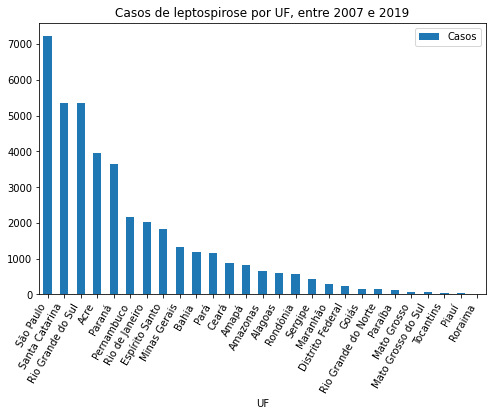

In [8]:
fig, ax = plt.subplots()
uf_tot.plot(kind='bar', figsize=(8,5), rot=60, ax=ax)
ax.set_xticklabels(labels=uf_tot.index, horizontalalignment='right')
plt.title('Casos de leptospirose por UF, entre 2007 e 2019')
plt.show()

###Criando tabela com ano e totais

In [9]:
ano_tot = pd.DataFrame(uf_ano.T.sum(axis=1),columns=['Casos'])
ano_tot.tail()

,Casos
2015,3728
2016,2542
2017,2493
2018,2449
2019,2743


###Visualizando casos de leptospirose por ano, entre 2007 e 2019

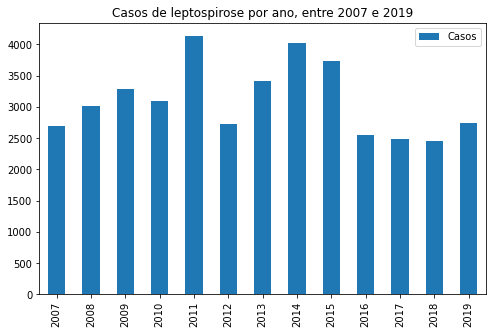

In [10]:
ano_tot.plot(kind='bar', figsize=(8,5))
plt.title('Casos de leptospirose por ano, entre 2007 e 2019')
plt.show()

##Carregando dados populacionais

In [11]:
url = "https://drive.google.com/uc?id=1Ys8btmvHvCULkq8_h28HAVFLJcPClGzr"
populacao_crus = pd.read_csv(url, encoding="UTF-8", sep=";", skiprows=3);

###Visualisando primeiras e últimas linhas

In [12]:
populacao_crus.head()

,Nível,Cód.,Município,2019
0,MU,1100015,Alta Floresta D'Oeste (RO),22945.0
1,MU,1100023,Ariquemes (RO),107863.0
2,MU,1100031,Cabixi (RO),5312.0
3,MU,1100049,Cacoal (RO),85359.0
4,MU,1100056,Cerejeiras (RO),16323.0


In [13]:
populacao_crus.tail(110).head()

,Nível,Cód.,Município,2019
5568,MU,5222302,Vila Propício (GO),5821.0
5569,MU,5300108,Brasília (DF),3015268.0
5570,Fonte: IBGE - Estimativas de População,NaN,NaN,NaN
5571,Notas,NaN,NaN,NaN
5572,Em 2003:\nO contingente populacional estimado ...,NaN,NaN,NaN


###Limpando informações no final do arquivo

In [14]:
populacao_crus = populacao_crus[:5570]
populacao_crus.tail()

,Nível,Cód.,Município,2019
5565,MU,5222005,Vianópolis (GO),13863.0
5566,MU,5222054,Vicentinópolis (GO),8743.0
5567,MU,5222203,Vila Boa (GO),6171.0
5568,MU,5222302,Vila Propício (GO),5821.0
5569,MU,5300108,Brasília (DF),3015268.0


###Montando tabela de trabalho
Excluindo coluna desnecessária, passando valores para int, criando coluna UF e limpando nome do município

In [15]:
populacao_limpa = populacao_crus.drop('Nível', axis=1)
populacao_limpa.columns = ['id_mun', 'nome', 'pessoas']

entre_parenteses = re.compile("\((.*)\)")
antes_parenteses = re.compile("(.*) \(")

populacao_limpa['UF'] = populacao_limpa['nome'].apply(lambda x: entre_parenteses.search(x).group(1))
populacao_limpa['nome'] = populacao_limpa['nome'].apply(lambda x: antes_parenteses.search(x).group(1))
populacao_limpa['pessoas'] = populacao_limpa['pessoas'].astype(int)
populacao_limpa['id_mun'] = populacao_limpa['id_mun'].astype(int)
populacao_limpa.set_index('id_mun', inplace=True)
populacao_limpa.tail()

,nome,pessoas,UF
id_mun,,,
5222005,Vianópolis,13863,GO
5222054,Vicentinópolis,8743,GO
5222203,Vila Boa,6171,GO
5222302,Vila Propício,5821,GO
5300108,Brasília,3015268,DF


###Criando tabela com população por UF

In [16]:
uf_populacao = populacao_limpa.groupby(['UF']).sum()
uf_populacao.head()

,pessoas
UF,
AC,881935
AL,3337357
AM,4144597
AP,845731
BA,14873064


##Analisando casos por milhão de habitantes por UF

###Montando tabela

In [17]:
nome_uf = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapá': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceará': 'CE',
    'Distrito Federal': 'DF',
    'Espírito Santo': 'ES',
    'Goiás': 'GO',
    'Maranhão': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Paraná': 'PR',
    'Paraíba': 'PB',
    'Pará': 'PA',
    'Pernambuco': 'PE',
    'Piauí': 'PI',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rio de Janeiro': 'RJ',
    'Rondônia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'Sergipe': 'SE',
    'São Paulo': 'SP',
    'Tocantins': 'TO'
}

In [18]:
uf2_tot = uf_tot.reset_index()
uf2_tot['UF'] = uf2_tot['UF'].apply(lambda x: nome_uf[x] if x in nome_uf else 'err')
uf2_tot.set_index('UF', inplace=True)
uf2_tot.head()

,Casos
UF,
SP,7233
SC,5341
RS,5339
AC,3939
PR,3641


In [19]:
uf_por_milhao = pd.concat([uf2_tot, uf_populacao], axis=1)
uf_por_milhao['Casos por milhão'] = (uf_por_milhao['Casos'] / uf_por_milhao['pessoas'] * 1000000).astype(int)
uf_por_milhao.head()

,Casos,pessoas,Casos por milhão
SP,7233,45919049,157
SC,5341,7164788,745
RS,5339,11377239,469
AC,3939,881935,4466
PR,3641,11433957,318


###Visualizando casos totais e por milhão

####Ordenado por casos totais

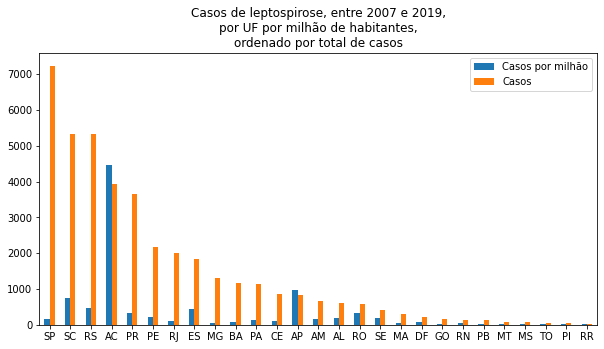

In [20]:
uf_por_milhao.plot(kind='bar', y=['Casos por milhão', 'Casos'], figsize=(10,5), rot=0)
plt.title(
    'Casos de leptospirose, entre 2007 e 2019,\n'
    'por UF por milhão de habitantes,\n'
    'ordenado por total de casos')
plt.show()

####Ordenado por casos por milhão

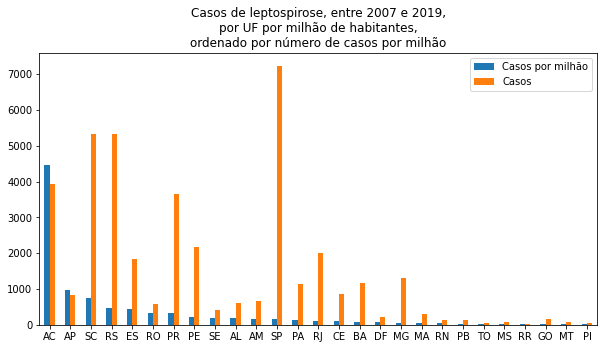

In [21]:
uf_por_milhao.sort_values(by='Casos por milhão', ascending=False, inplace=True)
uf_por_milhao.plot(kind='bar', y=['Casos por milhão', 'Casos'], figsize=(10,5), rot=0)
plt.title(
    'Casos de leptospirose, entre 2007 e 2019,\n'
    'por UF por milhão de habitantes,\n'
    'ordenado por número de casos por milhão')
plt.show()

##Analisando as casos do Acre no tempo
Como o estado do Acre se mostrou um ponto muito fora da curva, vamos analisar os casos desses estado por ano.

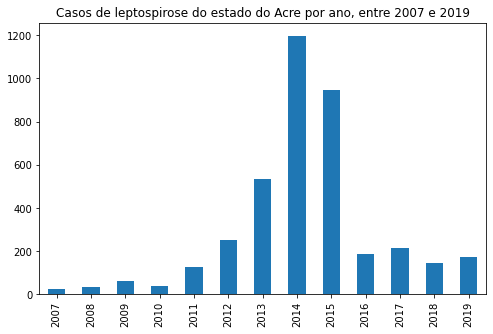

In [22]:
uf_ano.loc['Acre'].plot(kind='bar', figsize=(8,5))
plt.title('Casos de leptospirose do estado do Acre por ano, entre 2007 e 2019')
plt.show()

Como o gráfico mostrou 3 anos muito fora do padrão, pesquisei por motivos para tal. Encontrei vários artigos e estudos que sobre o assunto, confirmando que os dados do gráfico estão certos e esclarescendo que o motivo mais aceito, como explicação para tal aumento dos números de caso de leptospirose, foi um aumento significativo no nível do rio Acre no mesmo período.

"Observa-se  um  aumento  significativo  de  registro  de  casos  de  leptospirose  no  ano  de 2014, com tendência de manutenção no ano de 2015. O referido aumento esteve relacionado diretamente com os episódios de grandes enchentes ocorridas nesses dois anos que atingiram todo o estado, em especial a capital Rio Branco, na região do Baixo Acre e Purus, o município de Brasiléia, no Alto Acre e o município de Cruzeiro do Sul, na região Juruá Tarauacá/ Envira."

https://www.conass.org.br/pdf/planos-estaduais-de-saude/AC_PES%202016-2019%20-%20SESACRE-%20FINAL.pdf

###Tomando o caso do Acre como um outlier

Retomei as análises excluindo o estado.

##Analisando casos por milhão de habitantes por UF (excluindo Acre)

###Visualizando casos por milhão

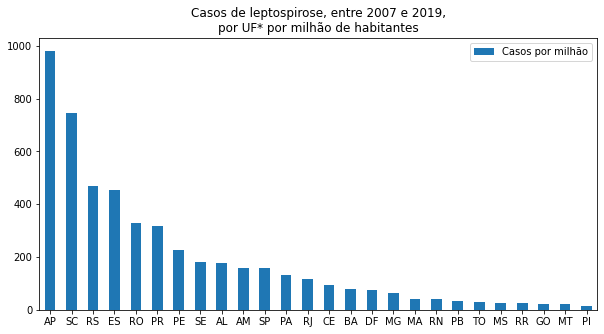

In [23]:
ufnac_por_milhao = uf_por_milhao.drop('AC')
ufnac_por_milhao.plot(kind='bar', y='Casos por milhão', figsize=(10,5), rot=0)
plt.title(
    'Casos de leptospirose, entre 2007 e 2019,\n'
    'por UF* por milhão de habitantes')
plt.show()

Mesmo retirando o Acre, ainda se observa uma grande variação entre estados.

Com os dados em ordem decrescente de número de casos, nota-se:

- que nas 7 primeiras posições já se encontram estados de 4 das 5 regiões brasileira.
- que os 3 estados da região centro-oeste só aparecem nas últimas 5 posições.

Sabendo que o centro-oeste é a região onde se encontram mais alagamentos naturais, fica claro que, se há relação dos casos da doença com alagamentos causados por maior volulme de chuvas, os alagamentos no caso são apenas os urbanos.

##Carregando Regiões Metropolitanas, Aglomerações Urbanas e RIDEs

In [24]:
url = "https://drive.google.com/uc?id=1zZFXiUXZsjRKaHKz-syPowm3um0UnjtH"
regioes_cru = pd.read_excel(url)
regioes_cru.tail()

,GRANDE_REG,COD_UF,SIGLA_UF,COD,NOME,TIPO,COD_CAT_ASSOC,CAT_ASSOC,COD_MUN,NOME_MUN,LEG,DATA
1429,Sul,42,SC,4202,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4202404,BLUMENAU,Lei Complementar 162,1998-01-06 00:00:00
1430,Sul,42,SC,4202,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4205902,GASPAR,Lei Complementar 162,1998-01-06 00:00:00
1431,Sul,42,SC,4202,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4207502,INDAIAL,Lei Complementar 162,1998-01-06 00:00:00
1432,Sul,42,SC,4202,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4213203,POMERODE,Lei Complementar 162,1998-01-06 00:00:00
1433,Sul,42,SC,4202,Região Metropolitana do Vale do Itajaí,RM,420201,Núcleo Metropolitano,4218202,TIMBÓ,Lei Complementar 162,1998-01-06 00:00:00


###Montando tabela de população metropolitana por UF

In [25]:
populosos = regioes_cru[['COD_MUN']]
populosos.columns = ['id_mun']
populosos.tail()

,id_mun
1429,4202404
1430,4205902
1431,4207502
1432,4213203
1433,4218202


In [26]:
pop_populosos = pd.merge(populacao_limpa, populosos, left_index=True, right_on='id_mun')
pop_populosos.set_index('id_mun', inplace=True)
pop_populosos.tail()

,nome,pessoas,UF
id_mun,,,
5221403,Trindade,127599,GO
5221858,Valparaíso de Goiás,168468,GO
5222203,Vila Boa,6171,GO
5222302,Vila Propício,5821,GO
5300108,Brasília,3015268,DF


In [27]:
uf_populosos = pop_populosos.groupby(['UF']).sum()
uf_populosos.head()

,pessoas
UF,
AL,2981291
AM,2676936
AP,646323
BA,5192288
CE,5213118


##Analisando casos por milhão de habitantes de munipipios populosos por UF

###Montando tabela

In [28]:
ufnac_tot = uf2_tot.drop('AC')
uf_por_milhao_pop = pd.concat([ufnac_tot, uf_populosos], axis=1)
uf_por_milhao_pop = uf_por_milhao_pop.fillna(0)
uf_por_milhao_pop_0 = uf_por_milhao_pop[uf_por_milhao_pop['pessoas'] == 0]
uf_por_milhao_pop = uf_por_milhao_pop[uf_por_milhao_pop['pessoas'] > 0]
uf_por_milhao_pop['Casos por milhão'] = (uf_por_milhao_pop['Casos'] / uf_por_milhao_pop['pessoas'] * 1000000).astype(int)
uf_por_milhao_pop.sort_values(by='Casos por milhão', ascending=False, inplace=True)
uf_por_milhao_pop.head()

,Casos,pessoas,Casos por milhão
AP,830,646323.0,1284
RO,585,556237.0,1051
ES,1830,1979337.0,924
RS,5339,6139993.0,869
SC,5341,7164788.0,745


###Visualizando casos por milhão de habitantes de munipipios populosos por UF

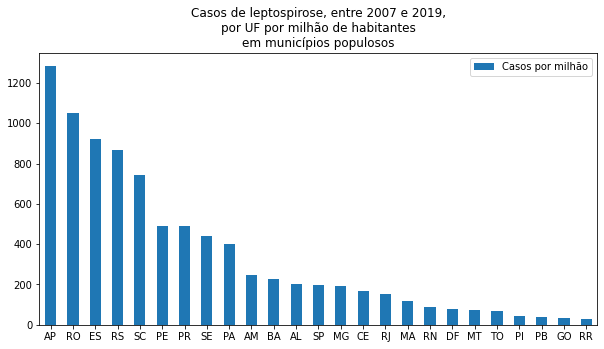

In [29]:
uf_por_milhao_pop.plot(kind='bar', y='Casos por milhão', figsize=(10,5), rot=0)
plt.title(
    'Casos de leptospirose, entre 2007 e 2019,\n'
    'por UF por milhão de habitantes\n'
    'em municípios populosos')
plt.show()

###Revendo gráfico de casos por milhão de habitantes por UF, com exclusão do Acre, outlier, e do Mato Grosso so Sul, que não tem nenhum minicipio na seleção feita acima.

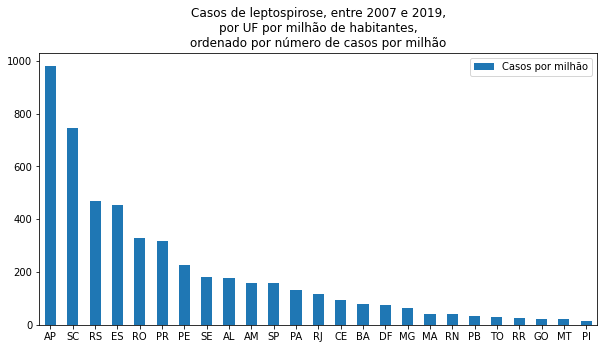

In [30]:
ufnac_por_milhao = uf_por_milhao.drop('AC')
ufnac_por_milhao = ufnac_por_milhao.drop('MS')
ufnac_por_milhao.sort_values(by='Casos por milhão', ascending=False, inplace=True)
ufnac_por_milhao.plot(kind='bar', y='Casos por milhão', figsize=(10,5), rot=0)
plt.title(
    'Casos de leptospirose, entre 2007 e 2019,\n'
    'por UF por milhão de habitantes,\n'
    'ordenado por número de casos por milhão')
plt.show()

###Comparando métricas

- casos por milhão

In [31]:
ufnac_por_milhao.describe()

,Casos,pessoas,Casos por milhão
count,25.000000,2.500000e+01,25.000000
mean,1452.880000,8.259448e+06,199.600000
std,1929.577983,9.458074e+06,240.474011
min,16.000000,6.057610e+05,14.000000
25%,151.000000,3.273227e+06,41.000000
50%,661.000000,4.144597e+06,116.000000
75%,1830.000000,9.557071e+06,227.000000
max,7233.000000,4.591905e+07,981.000000


- casos por milhão, contando apenas municipios populosos

In [32]:
uf_por_milhao_pop.describe()

,Casos,pessoas,Casos por milhão
count,25.000000,2.500000e+01,25.000000
mean,1452.880000,4.896714e+06,345.720000
std,1929.577983,7.160217e+06,358.405557
min,16.000000,5.537150e+05,28.000000
25%,151.000000,1.054795e+06,76.000000
50%,661.000000,2.981291e+06,199.000000
75%,1830.000000,5.213118e+06,488.000000
max,7233.000000,3.625506e+07,1284.000000


In [33]:
aumento_std = (uf_por_milhao_pop['Casos por milhão'].std() / ufnac_por_milhao['Casos por milhão'].std() - 1) * 100
print(f"Aumento do desvio padrão: {aumento_std:.2f}%")

Aumento do desvio padrão: 49.04%


Na segunda análise o desvio padrão ficou praticamente 50% maior, mostrando maior padrão dos dados entre todos os estados.

#Conclusão

A análise feita, sobre os dados disponíveis, confirma a afirmação de que há uma relação entre o tamanho das áreas metropolitanas e o número de casos de leptospirose.

##Possível desenvolvimento

Esta análise se ateve a analisar os casos totais dos estados. Para chegar a uma analise mais precisa poderíamos utilizar as quantidades de casos espefícicamente dos municípios mais populosos. 